<a href="https://colab.research.google.com/github/Udaybabubojja/machine-learning/blob/main/Univarient_Regressiion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

In [5]:
data=pd.read_csv("boston.csv")
data.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
434,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666,20.2,100.63,15.17,11.7
125,0.16902,0.0,25.65,0,0.581,5.986,88.4,1.9929,2,188,19.1,385.02,14.81,21.4
147,2.36862,0.0,19.58,0,0.871,4.926,95.7,1.4608,5,403,14.7,391.71,29.53,14.6
263,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264,13.0,393.42,11.25,31.0


In [10]:
x=data.drop('medv', axis=1).values
y=data['medv'].values
print(x)
print(y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [15]:
x_rooms=x[:, 5]
x_rooms

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [13]:
type(x_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [16]:
x_rooms.shape, y.shape

((506,), (506,))

In [42]:
x_rooms=x_rooms.reshape(-1,1)
print(x_rooms)
y=y.reshape(-1,1)


[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [19]:
x_rooms.shape, y.shape

((506, 1), (506, 1))

Text(0, 0.5, 'value of house /1000$')

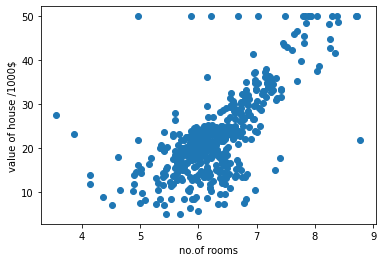

In [28]:
 plt.scatter(x_rooms, y)
 plt.xlabel("no.of rooms")
 plt.ylabel("value of house /1000$")

In [29]:
reg = linear_model.LinearRegression()
reg.fit(x_rooms, y)

LinearRegression()

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
y_pred=reg.predict(x_rooms)


In [34]:
print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')
     

MAE = 4.4477729015322325
MSE = 43.60055177116956
RMSE = 6.603071389222561
R_2 = 0.48352545599133423


In [39]:
prediction_space = np.linspace(min(x_rooms), max(x_rooms)).reshape(-1,1)
prediction_space

array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082],
       [4.09355102],
       [4.20006122],
       [4.30657143],
       [4.41308163],
       [4.51959184],
       [4.62610204],
       [4.73261224],
       [4.83912245],
       [4.94563265],
       [5.05214286],
       [5.15865306],
       [5.26516327],
       [5.37167347],
       [5.47818367],
       [5.58469388],
       [5.69120408],
       [5.79771429],
       [5.90422449],
       [6.01073469],
       [6.1172449 ],
       [6.2237551 ],
       [6.33026531],
       [6.43677551],
       [6.54328571],
       [6.64979592],
       [6.75630612],
       [6.86281633],
       [6.96932653],
       [7.07583673],
       [7.18234694],
       [7.28885714],
       [7.39536735],
       [7.50187755],
       [7.60838776],
       [7.71489796],
       [7.82140816],
       [7.92791837],
       [8.03442857],
       [8.14093878],
       [8.24744898],
       [8.35395918],
       [8.46046939],
       [8.566

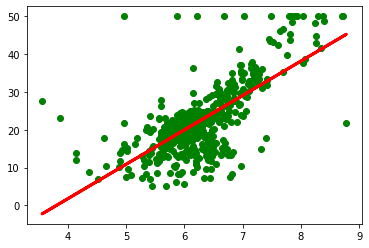

In [38]:
plt.scatter(x_rooms, y, color='green')
plt.plot(x_rooms, reg.predict(x_rooms), color='red', linewidth=3)
plt.show()

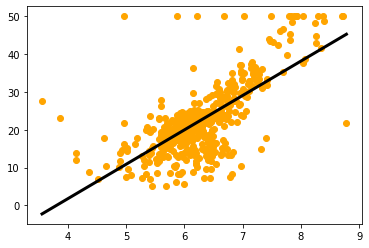

In [41]:
plt.scatter(x_rooms, y, color='orange')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()